In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt

In [3]:
def pareto_front(n: int, xobj:str = 'min', yobj: str = 'min') -> tuple:
    x = np.random.uniform(low = 0, high = 5, size = n)
    y = np.random.uniform(low = 0, high = 5, size = n)
    if xobj == 'max':
        order = np.argsort(x)[::-1]
    else:
        order = np.argsort(x)
    pareto_opitimal = [order[0]]
    if yobj == 'max':
        for index, value in enumerate(order):
            if index == 0:
                best_y = y[value]
            elif y[value] >= best_y:
                best_y = y[value]
                pareto_opitimal.append(value)
            else:
                continue
    else:
        for index, value in enumerate(order):
            if index == 0:
                best_y = y[value]
            elif y[value] <= best_y:
                best_y = y[value]
                pareto_opitimal.append(value)
            else:
                continue
    classification = np.repeat('Non-Opitimal', n).astype('object')
    classification[pareto_opitimal] = 'Pareto Optimal'
    return (-x, y, np.array(classification))

In [4]:
x, y, classe = pareto_front(50, 'max')

In [5]:
df = pd.DataFrame([(i, j, k) for i, j, k in zip(x, y, classe)], columns = ['x', 'y', 'classe'])

In [6]:
scatter = alt.Chart(df).mark_point().encode(
        x = 'x:Q', 
        y = 'y:Q', 
        color = alt.Color('classe', scale=alt.Scale(domain=['Non-Opitimal', 'Pareto Optimal'], range=["#377EB8", "#E41A1C"])),
        fill = alt.Color('classe', scale=alt.Scale(domain=['Non-Opitimal', 'Pareto Optimal'], range=["#377EB8", "#E41A1C"])),
        tooltip = ['x', 'y']
    )
    
line = alt.Chart(df[df['classe'] == 'Pareto Optimal']).mark_line().encode(
            x = 'x:Q',
            y = 'y:Q',
        color = alt.Color('classe', scale=alt.Scale(domain=['Non-Opitimal', 'Pareto Optimal'], range=["#377EB8", "#E41A1C"])),
        tooltip = ['x', 'y']
    )
scatter

2021-03-29 14:33:39.807 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


alt.Chart(...)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

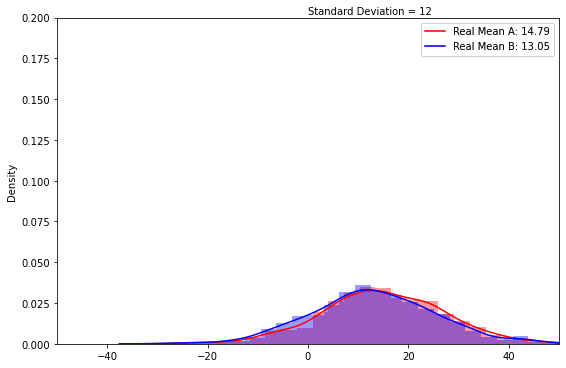

In [7]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML
std = 3 # start std 
Am = 15. # mean of first normal
Bm = 12.5 # mean of second normal
fig, ax = plt.subplots(figsize=(9,6)) # empty fig
camera = Camera(fig)
for j in range(10):
    plt.ylim((0, 0.2)) # setting up the limits (or else it will auto ajust
    plt.xlim((-50, 50))
    
    A = np.random.normal(Am, std, size=(1000)) # creating the 1000-sized normals
    B = np.random.normal(Bm, std, size=(1000))    
    A_plot = sns.distplot(A, color='red') 
    B_plot = sns.distplot(B, color='blue')
    plt.legend(( 
        'Real Mean A: {:.2f}'.format(np.mean(A)),
        'Real Mean B: {:.2f}'.format(np.mean(B))
    ))
        
    ax.text(0.5, 1.01, "Standard Deviation = "+str(std), transform=ax.transAxes) # making the dynamic title
    camera.snap() # camera snapshot
    
    std += 1 # incrementing the std
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [275]:
 decode('0000000000', -5, 5)

-5.0

In [18]:
np.array([[1,4],[3,1]])[np.argsort(np.array([[1,4],[3,1]])[:, 1])]

array([[3, 1],
       [1, 4]])

In [19]:
def decode(string, min, max):
    value = int(string, 2)
    return (((max - min) / (2**len(string) - 1)) * value) + min

def genetic_opt(f: callable, npop: int, maxgen: int, nbits: int = 10, pc = 0.9, xmin: int = -5, xmax: int = 5, ymin: int = -5, ymax: int = 5, n_tourn = 5):
    
    pm = 1 / (npop * np.sqrt(nbits)) # Probabilida de mutação

    # Inicializa a população selecionando valores aleatórios
    pop = np.empty((npop, 3), dtype = 'object')
    for i in range(npop):
        pop[i, 0] = ''.join([str(j) for j in np.random.randint(0, 2, nbits)])
        pop[i, 1] = ''.join([str(j) for j in np.random.randint(0, 2, nbits)])
        pop[i, 2] = f(decode(pop[i, 0], xmin, xmax), decode(pop[i, 1], ymin, ymax))
    
    ngen = 0
    while ngen < maxgen:
        next_gen = np.empty((1, 3), dtype = 'object')[1::]

        # Preenche a próxima geração
        while next_gen.shape[0] < npop:

            # Utiliza torunament selection para criar o mating pool
            champions = []
            for l in range(2):
                tourn = np.random.choice(range(npop), size = n_tourn, replace = False)
                candidates = pop[tourn, :]
                champions.append(candidates[np.argsort(candidates[:, 2])][0, [0, 1]])
            dad, mom = champions

            # Faz o crossover utilizando 2 point crossover
            if np.random.uniform(size = 1) < pc:
                offspring1 = []
                offspring2 = []
                for i in range(2):
                    first_cpoint = np.random.randint(0, nbits, size = 1)[0]
                    if first_cpoint == nbits - 1:
                        second_cpoint = first_cpoint
                        first_cpoint = np.random.randint(0, second_cpoint, size = 1)[0]
                    else:
                        second_cpoint = np.random.randint(first_cpoint + 1, nbits, size = 1)[0]

                    var1 = dad[i][:first_cpoint] + mom[i][first_cpoint:second_cpoint] + dad[i][second_cpoint:]
                    var2 = mom[i][:first_cpoint] + dad[i][first_cpoint:second_cpoint] + mom[i][second_cpoint:]

                    ## Ajusta as variáveis que passarem dos limites estabelecidos
                    if decode(var1, xmin, xmax) > xmax:
                        var1 = '1111111111'
                    elif decode(var1, xmin, xmax) < xmin:
                        var1 = '0000000000'
                    
                    if decode(var2, ymin, ymax) > ymax:
                        var2 = '1111111111'
                    elif decode(var2, ymin, ymax) < ymin:
                        var2 = '0000000000'
                    
                    offspring1.append(var1)
                    offspring2.append(var2)

                # o valor da fitness function ainda não é calculado
                offspring1.append(0)
                offspring2.append(0)

                # Acrescenta o indivíduo a próxima geração
                next_gen = np.vstack((next_gen, np.array(offspring1), np.array(offspring2)))
        
        # Realiza a mutação nos indivíduos da geração seguinte
        for i in range(next_gen.shape[0]):
            for j in range(next_gen.shape[1]):
                if j == 2:
                    next_gen[i, j] = f(decode(next_gen[i, 0], xmin, xmax), decode(next_gen[i, 1], ymin, ymax))
                else:
                    for k in range(len(next_gen[i, j])):
                        u = np.random.uniform(size = 1)
                        if u < pm:
                            next_gen[i, j] = next_gen[i, j][:k] + str(1 - int(next_gen[i, j][k])) + next_gen[i, j][(k + 1):]
                        else:
                            continue
        
        # Junta as duas populações e seleciona os npop-melhores indivíduos
        joined_pop = np.vstack((pop, next_gen))
        pop = joined_pop[np.argsort(joined_pop[:, 2])][range(npop), :]
        ngen += 1
    
    # Retorna a população com os valores decodificados
    for i in range(npop):
        pop[i, 0] = decode(pop[i, 0], xmin, xmax)
        pop[i, 1] =  decode(pop[i, 1], ymin, ymax)
    return pop

In [37]:
def func(x, y):
    return (10 * np.sin(np.sqrt(x**2 + y**2))) / (np.sqrt(x**2 + y**2))

In [121]:
result = genetic_opt(func, 1000, 20, pc = 0.9, n_tourn = 2)

In [122]:
df = pd.DataFrame(result, columns = ['x', 'y', 'f']).astype('float64')

In [125]:
alt.Chart(df, height=400, width=600).mark_point().encode(
        x = 'x:Q', 
        y = 'y:Q', 
        tooltip = ['x', 'y']
    )

alt.Chart(...)